In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

In [2]:
#load data
data = pd.read_pickle('data_cleaned.pkl')


In [3]:
pn_instruments = ['apc','dc_2sm','dc_sn008','dc_sn010']

pn_data =data[data.measurement_instrument.isin(pn_instruments)]



In [4]:
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid')
# instrument_colors = {'apc': 'tab:blue',
#                      'dc_sn008':'tab:orange',
#                      'dc_sn010': 'tab:red',
#                      'dc_2sm': 'tab:cyan',
#                      'smps': 'tab:purple',
#                      'eeps':'tab:olive'}
palette = ['tab:blue','tab:red','tab:cyan','tab:orange']

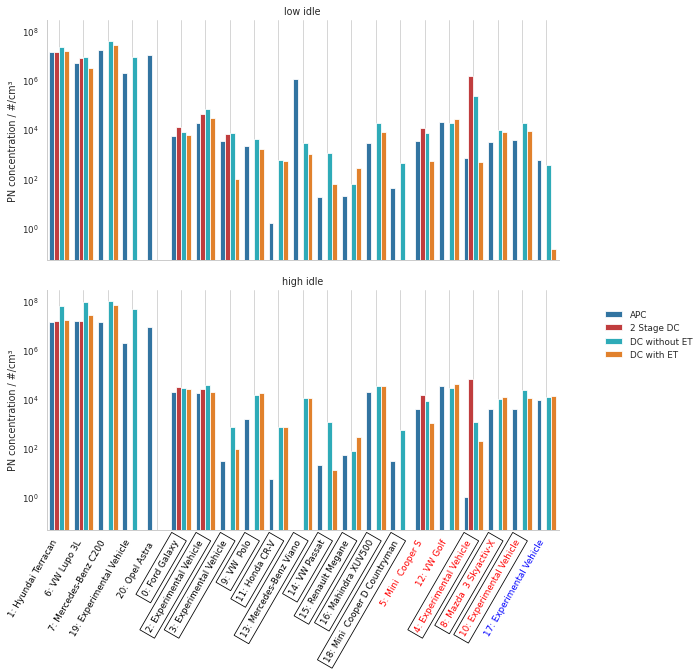

In [64]:
g = sns.catplot(kind ='bar',x = 'vehicle_name_paper',y ='c_mean',row = 'mode',hue = 'measurement_instrument',palette = palette,data = pn_data.sort_values(['combustion_type','particle_filter']), height=4, aspect=10/5)
plt.yscale('log')
g.set_xticklabels(rotation=60,horizontalalignment = 'right',verticalalignment = 'top')
g.set(xlabel = '',ylabel = 'PN concentration / #/cm³')
g.axes[0][0].grid(axis = 'both')
g.axes[1][0].grid(axis = 'both')

g.axes[0][0].set_title('low idle')
g.axes[1][0].set_title('high idle')

colors ={'Diesel':'black','Gasoline DI':'red', 'Gasoline PFI':'blue'}
box_on = {1:'black',0:'none'}
for n in range(2):
    
    ticks = g.axes[n][0].get_xticklabels()
    for k,tick in enumerate(ticks):
        v_id = g.data.vehicle_id.unique()[k]
        tick.set_color(colors[g.data[g.data.vehicle_id ==  v_id].loc[:,'combustion_type'].unique()[0]])
        pf = g.data[g.data.vehicle_id == v_id].loc[:,'particle_filter'].unique()[0]
        tick.set_bbox(dict(facecolor = 'none',edgecolor = box_on[pf]))
new_labels = ['APC','2 Stage DC','DC without ET','DC with ET']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g._legend.set_title('')